In [170]:
import cv2
import numpy as np
import torch
import matplotlib.pylab as plt
from mtcnn import MTCNN
from keras_facenet import FaceNet
from scipy.spatial.distance import cosine
from skimage import io
import warnings
warnings.filterwarnings("ignore")
plt.style.use('dark_background')

In [171]:
detector=MTCNN()

In [172]:
img_vk18 = r'C:\Users\HP\OneDrive\Desktop\workshopllm\images\2.jpg'
img2_vk18 = r'C:\Users\HP\OneDrive\Desktop\workshopllm\\images\3.jpg'

img_klr = r'C:\Users\HP\OneDrive\Desktop\workshopllm\\images\4.jpg'
img2_klr = r'C:\Users\HP\OneDrive\Desktop\workshopllm\\images\5.jpg'

img_rs45 = r'C:\Users\HP\OneDrive\Desktop\workshopllm\\images\7.jpg'
img2_rs45 = r'C:\Users\HP\OneDrive\Desktop\workshopllm\\images\9.jpg'

img_hp33 = r'C:\Users\HP\OneDrive\Desktop\workshopllm\\images\10.jpg'
img2_hp33 = r'C:\Users\HP\OneDrive\Desktop\workshopllm\\images\11.jpg'

img_arsh = r'C:\Users\HP\OneDrive\Desktop\workshopllm\\images\12.jpg'
img2_arsh = r'C:\Users\HP\OneDrive\Desktop\workshopllm\\images\13.jpg'

images_list = [img_vk18 , img_klr , img_rs45 , img_hp33 , img_arsh ,img2_vk18 , img2_klr , img2_rs45 , img2_hp33 , img2_arsh]

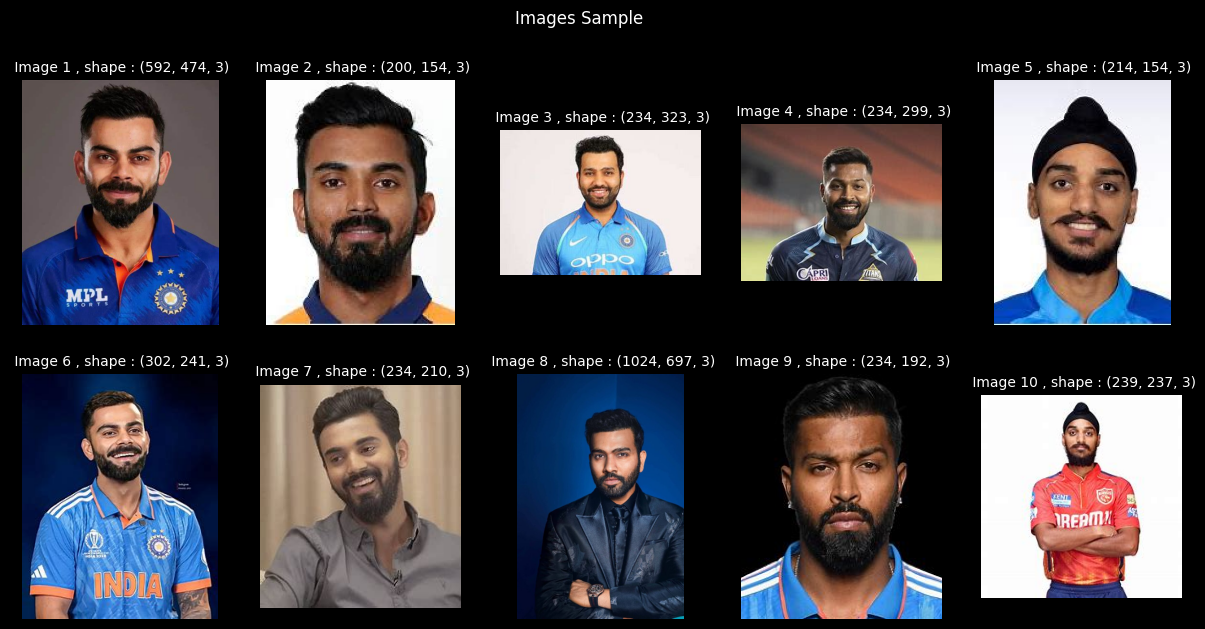

In [173]:
plt.figure(figsize=(15, 7))
for i in range(10):
    plt.subplot(2 , 5,i+1)
    plt.suptitle('Images Sample ')
    imgs = plt.imread(images_list[i])
    plt.imshow(imgs)
    plt.axis('off')
    plt.title(f" Image {i + 1} , shape : {imgs.shape}" , size=10)

In [174]:
class Color:
   GREEN = '\033[92m'
   BLUE = '\033[94m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   END = '\033[0m'

In [175]:
def Face_Detection(image=None , model = MTCNN() , color ='red' , url = None , sz=10 ):
    print(f'{Color.BOLD}The process has been started for detection faces ...')
    plt.style.use('dark_background')
    if url:
        img = io.imread(url)
    if image:
        img = plt.imread(image)
    model = model
    coordinates = model.detect_faces(img)
    
    plt.style.use('dark_background')
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Face Detection')
    plt.axis('off')
    ax=plt.gca()
    for coordinate in coordinates:
        print('{}The box coordinates :{} {}\n{}The confidence :{} {}\n{}The keypoints :{} {}'.format(Color. GREEN ,Color.END ,coordinate['box'] ,Color.RED , Color.END, coordinate['confidence'],Color.BLUE , Color.END , coordinate['keypoints']))
        x,y,width , height = coordinate['box']
        rect = plt.Rectangle((x, y), width, height, fill=False, color=color)
        ax.add_patch(rect)
        

    plt.subplot(1, 2, 2)
    plt.imshow(img)
    plt.title(f'key points ')
    plt.axis('off')
    for coordinate in coordinates:
        left_eye = coordinate['keypoints']['left_eye']
        right_eye = coordinate['keypoints']['right_eye']
        nose = coordinate['keypoints']['nose']
        mouth_left = coordinate['keypoints']['mouth_left']
        mouth_right = coordinate['keypoints']['mouth_right']
        plt.scatter(left_eye[0] , left_eye[1], color='red' , s=sz)
        plt.scatter(right_eye[0] , right_eye[1], color='red' , s=sz)
        plt.scatter(nose[0] , nose[1], color='red' , s=sz)
        plt.scatter( mouth_left[0] , mouth_left[1], color='red' , s=sz)
        plt.scatter(mouth_right[0], mouth_right[1], color='red' , s=sz)
        

    plt.show()
    print('--'*30)

The process has been started for detection faces ...
The box coordinates : [154, 96, 175, 227]
The confidence : 0.9999995231628418
The keypoints : {'nose': [np.int64(240), np.int64(232)], 'mouth_right': [np.int64(278), np.int64(265)], 'right_eye': [np.int64(279), np.int64(186)], 'left_eye': [np.int64(198), np.int64(185)], 'mouth_left': [np.int64(204), np.int64(263)]}


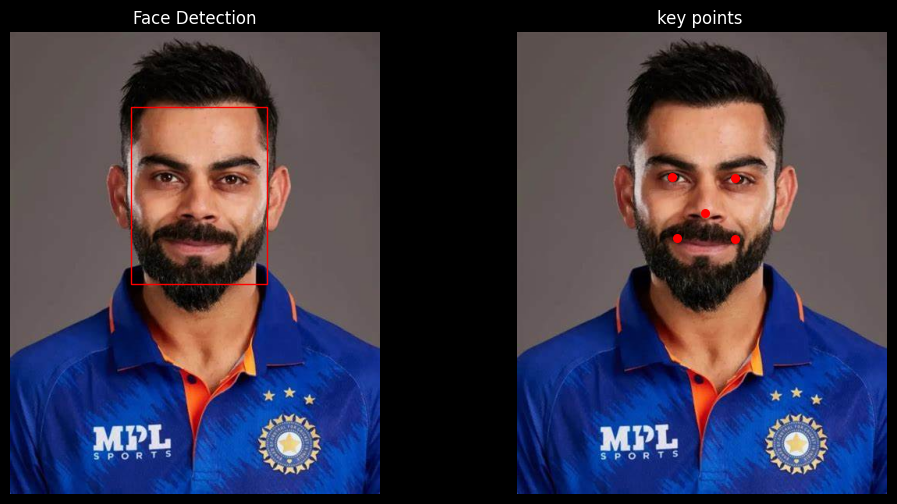

------------------------------------------------------------
The process has been started for detection faces ...
The box coordinates : [31, 36, 90, 119]
The confidence : 0.9998947381973267
The keypoints : {'nose': [np.int64(78), np.int64(102)], 'mouth_right': [np.int64(95), np.int64(124)], 'right_eye': [np.int64(98), np.int64(83)], 'left_eye': [np.int64(56), np.int64(83)], 'mouth_left': [np.int64(59), np.int64(124)]}


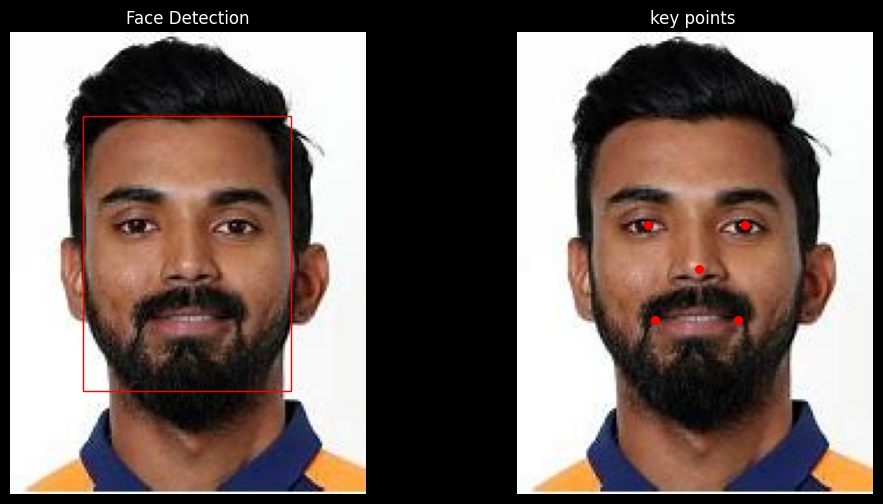

------------------------------------------------------------
The process has been started for detection faces ...
The box coordinates : [129, 35, 62, 88]
The confidence : 0.9999518394470215
The keypoints : {'nose': [np.int64(158), np.int64(88)], 'mouth_right': [np.int64(174), np.int64(98)], 'right_eye': [np.int64(173), np.int64(70)], 'left_eye': [np.int64(144), np.int64(71)], 'mouth_left': [np.int64(145), np.int64(99)]}


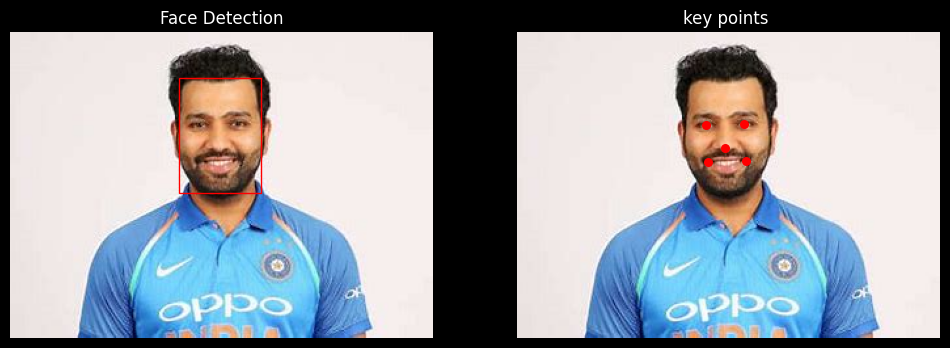

------------------------------------------------------------
The process has been started for detection faces ...
The box coordinates : [127, 58, 65, 86]
The confidence : 0.9989708662033081
The keypoints : {'nose': [np.int64(159), np.int64(110)], 'mouth_right': [np.int64(174), np.int64(122)], 'right_eye': [np.int64(174), np.int64(93)], 'left_eye': [np.int64(143), np.int64(93)], 'mouth_left': [np.int64(143), np.int64(122)]}


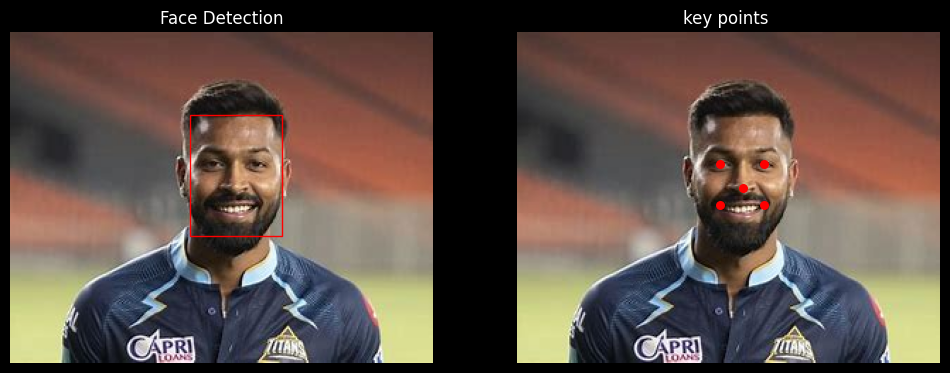

------------------------------------------------------------
The process has been started for detection faces ...
The box coordinates : [40, 52, 76, 105]
The confidence : 0.9999736547470093
The keypoints : {'nose': [np.int64(78), np.int64(109)], 'mouth_right': [np.int64(96), np.int64(131)], 'right_eye': [np.int64(98), np.int64(93)], 'left_eye': [np.int64(59), np.int64(90)], 'mouth_left': [np.int64(58), np.int64(127)]}


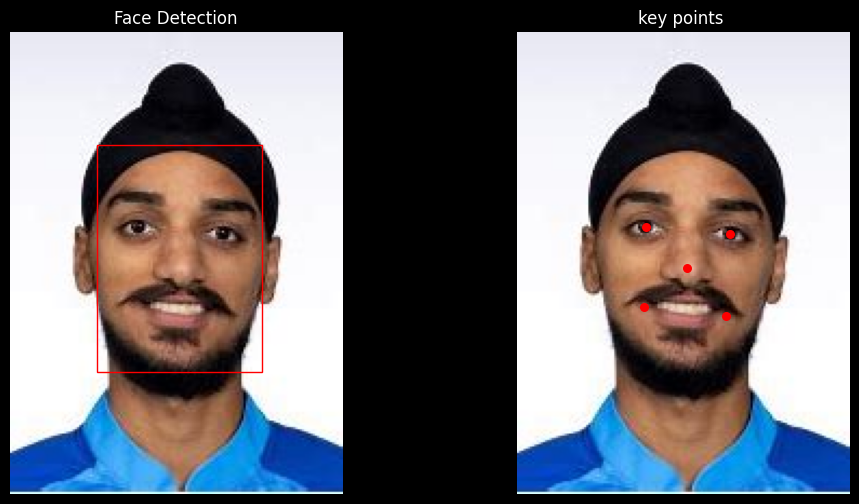

------------------------------------------------------------
The process has been started for detection faces ...
The box coordinates : [87, 40, 66, 85]
The confidence : 0.9979389309883118
The keypoints : {'nose': [np.int64(127), np.int64(82)], 'mouth_right': [np.int64(141), np.int64(98)], 'right_eye': [np.int64(139), np.int64(69)], 'left_eye': [np.int64(107), np.int64(72)], 'mouth_left': [np.int64(110), np.int64(101)]}


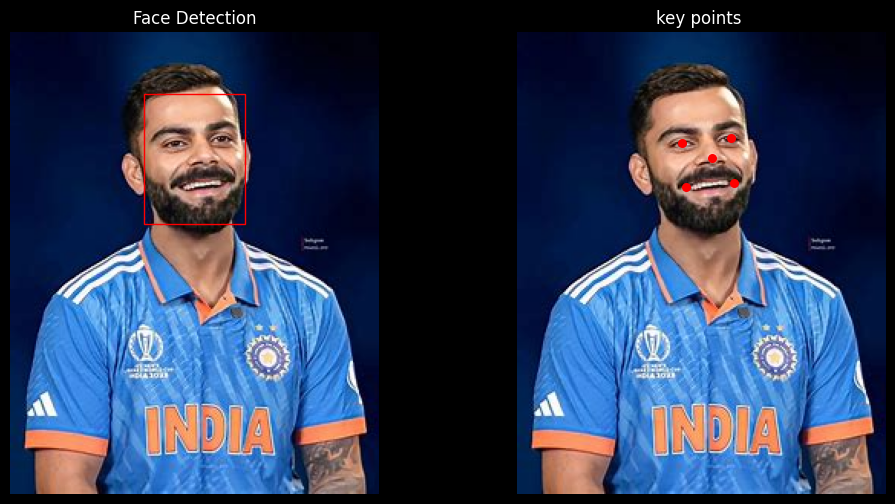

------------------------------------------------------------
The process has been started for detection faces ...
The box coordinates : [63, 36, 73, 91]
The confidence : 0.999799907207489
The keypoints : {'nose': [np.int64(99), np.int64(89)], 'mouth_right': [np.int64(121), np.int64(97)], 'right_eye': [np.int64(110), np.int64(67)], 'left_eye': [np.int64(80), np.int64(77)], 'mouth_left': [np.int64(91), np.int64(107)]}


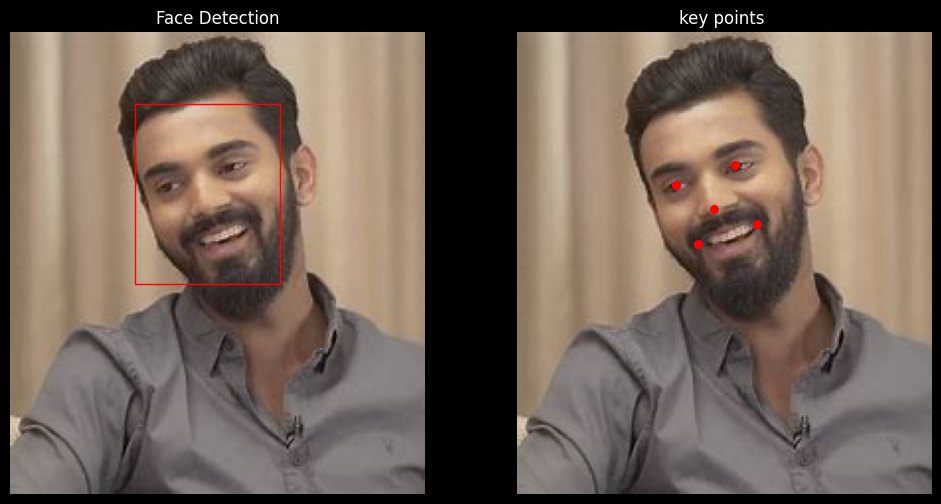

------------------------------------------------------------
The process has been started for detection faces ...
The box coordinates : [306, 222, 206, 283]
The confidence : 0.9999995231628418
The keypoints : {'nose': [np.int64(383), np.int64(400)], 'mouth_right': [np.int64(434), np.int64(442)], 'right_eye': [np.int64(439), np.int64(336)], 'left_eye': [np.int64(343), np.int64(341)], 'mouth_left': [np.int64(355), np.int64(445)]}


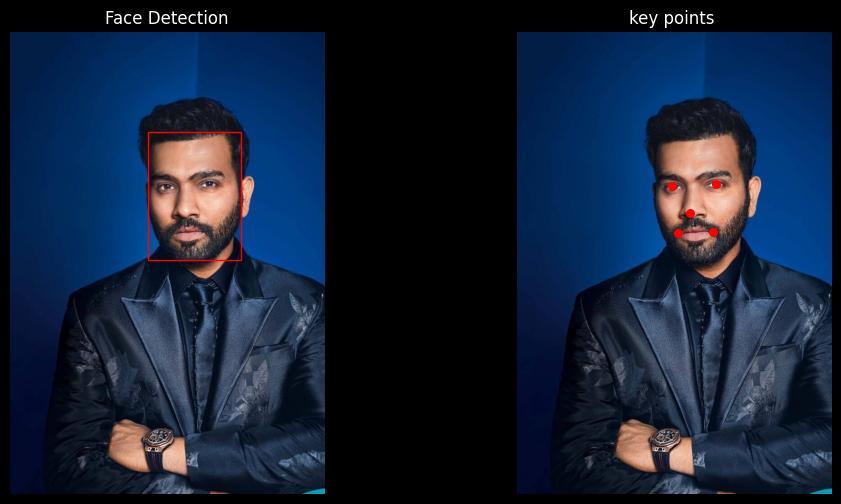

------------------------------------------------------------
The process has been started for detection faces ...
The box coordinates : [51, 36, 98, 133]
The confidence : 0.999789297580719
The keypoints : {'nose': [np.int64(101), np.int64(114)], 'mouth_right': [np.int64(119), np.int64(139)], 'right_eye': [np.int64(122), np.int64(88)], 'left_eye': [np.int64(76), np.int64(89)], 'mouth_left': [np.int64(83), np.int64(140)]}


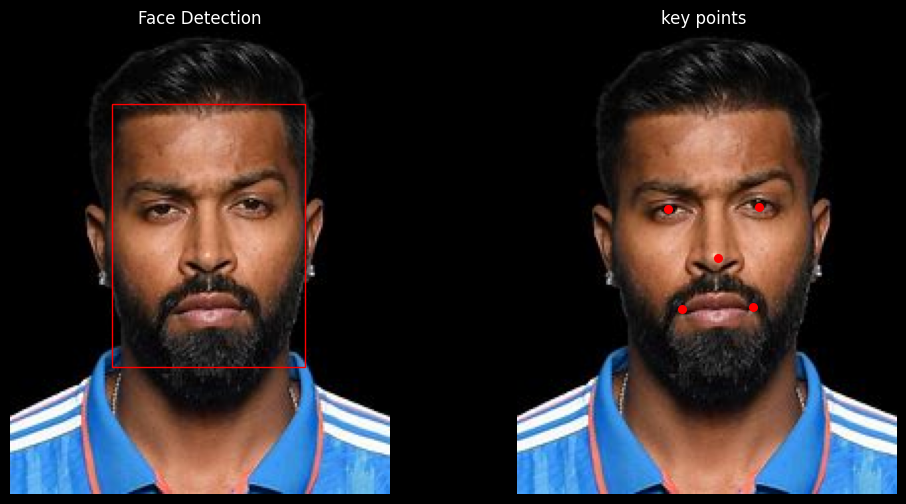

------------------------------------------------------------
The process has been started for detection faces ...
The box coordinates : [100, 27, 35, 47]
The confidence : 0.9998728036880493
The keypoints : {'nose': [np.int64(117), np.int64(53)], 'mouth_right': [np.int64(125), np.int64(63)], 'right_eye': [np.int64(127), np.int64(45)], 'left_eye': [np.int64(108), np.int64(44)], 'mouth_left': [np.int64(110), np.int64(62)]}


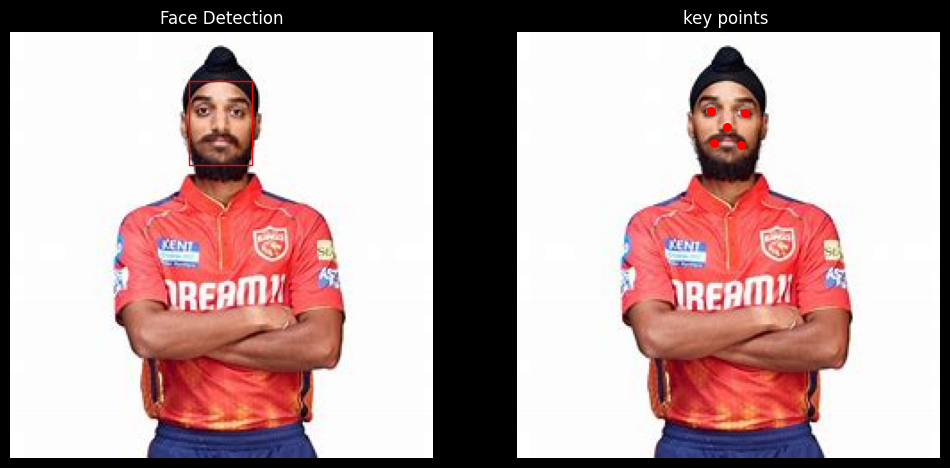

------------------------------------------------------------


In [176]:
for img in images_list:
    Face_Detection(image=img , sz=30)

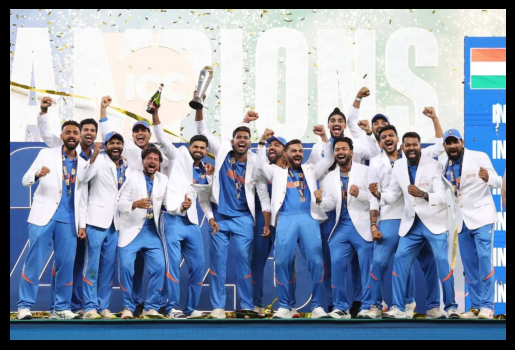

In [177]:
gp= r'C:\Users\HP\OneDrive\Desktop\workshopllm\images\winner.jpg'
image = io.imread(gp)
plt.imshow(image)
plt.axis('off')
plt.show()

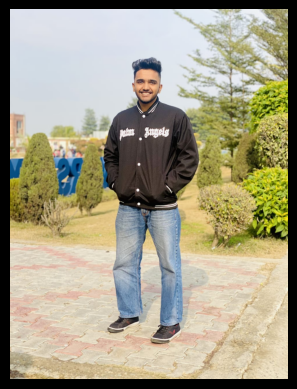

In [178]:
gp1= r'C:\Users\HP\OneDrive\Desktop\workshopllm\images\pic.jpeg'
image1 = io.imread(gp1)
plt.imshow(image1)
plt.axis('off')
plt.show()

The process has been started for detection faces ...
The box coordinates : [436, 318, 36, 42]
The confidence : 0.9999982118606567
The keypoints : {'nose': [np.int64(457), np.int64(343)], 'mouth_right': [np.int64(463), np.int64(350)], 'right_eye': [np.int64(465), np.int64(335)], 'left_eye': [np.int64(449), np.int64(334)], 'mouth_left': [np.int64(447), np.int64(349)]}
The box coordinates : [128, 280, 39, 52]
The confidence : 0.9999473094940186
The keypoints : {'nose': [np.int64(149), np.int64(307)], 'mouth_right': [np.int64(156), np.int64(320)], 'right_eye': [np.int64(159), np.int64(301)], 'left_eye': [np.int64(139), np.int64(300)], 'mouth_left': [np.int64(140), np.int64(319)]}
The box coordinates : [623, 316, 37, 47]
The confidence : 0.999947190284729
The keypoints : {'nose': [np.int64(632), np.int64(335)], 'mouth_right': [np.int64(642), np.int64(349)], 'right_eye': [np.int64(646), np.int64(330)], 'left_eye': [np.int64(628), np.int64(331)], 'mouth_left': [np.int64(628), np.int64(349)]}


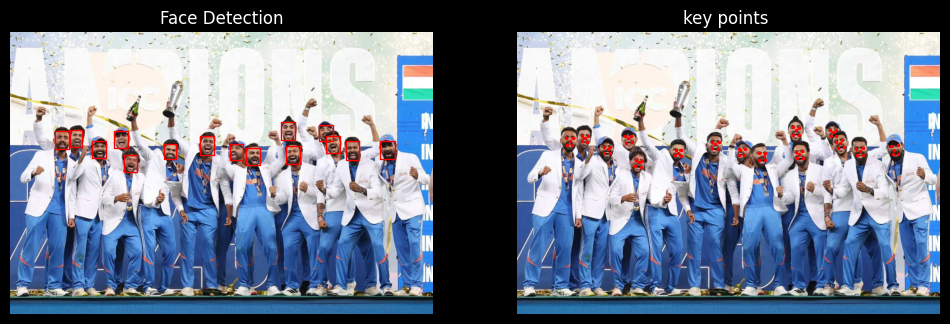

------------------------------------------------------------


In [179]:
Face_Detection(url=gp , sz=2)

The process has been started for detection faces ...
The box coordinates : [432, 210, 82, 109]
The confidence : 0.9976944327354431
The keypoints : {'nose': [np.int64(469), np.int64(276)], 'mouth_right': [np.int64(488), np.int64(290)], 'right_eye': [np.int64(491), np.int64(255)], 'left_eye': [np.int64(452), np.int64(252)], 'mouth_left': [np.int64(449), np.int64(287)]}


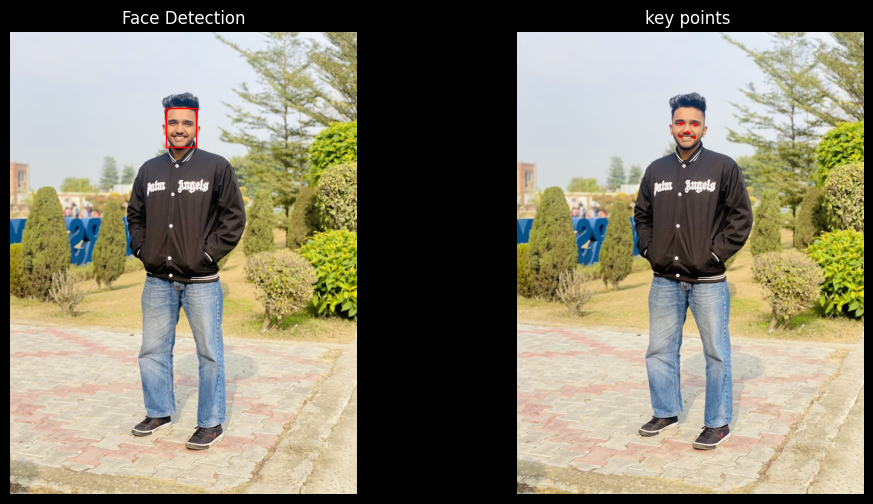

------------------------------------------------------------


In [180]:
Face_Detection(url=gp1 , sz=2)

In [181]:
def reading_img(img_path):
    img = cv2.imread(img_path)
    image = cv2.cvtColor(img , code=cv2.COLOR_BGR2RGB)
    return image

In [182]:
def Face_Detection_FaceNet(image , margin=0.2):
    model = MTCNN()
    detection = model.detect_faces(image)
    if detection:
        x , y ,width , height = detection[0]['box']
        margin = margin
        x_min, y_min = max(x - int(margin * width), 0), max(y - int(margin * height), 0)
        x_max, y_max = min(x + width + int(margin * width), image.shape[1]), min(y + height + int(margin * height), image.shape[0])
        face_box  = image[y_min:y_max, x_min:x_max]
        image_with_face_detection= cv2.resize(face_box, (160, 160))
        return image_with_face_detection
    else:
        return None

In [183]:
def Embeding(fimage_with_face_detection):
    model = FaceNet()
    Embedding_vector = model.embeddings([fimage_with_face_detection])[0]
    print("Embedding vector:", Embedding_vector)  # This will print the vector
    return Embedding_vector

In [184]:
def Similarity_Measurement(embedding_vector1 , embedding_vector2 , threshold = 0.7):
    Distance = cosine(embedding_vector1 ,embedding_vector2)
    scan_distnace = Distance < threshold
    return scan_distnace

In [185]:
def Comparison_Faces(img1 , img2):
    
    image1 = reading_img(img1)
    image2 = reading_img(img2)

    face1 = Face_Detection_FaceNet(image=image1 , margin=0.2)
    face2 = Face_Detection_FaceNet(image=image2 , margin=0.2)

    if face1 is not None and face2 is not None : 
        plt.style.use('dark_background')
        plt.figure(figsize=(12, 6))
        plt.suptitle('Faces Comparison')

        plt.subplot(1, 2, 1)
        plt.imshow(face1)
        plt.title(f'Image 1 :\nThe shape{face1.shape}')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(face2)
        plt.title(f'Image 2 :\nThe shape{face2.shape}')
        plt.axis('off')

        plt.show()

        embed1 = Embeding(face1)
        embed2 = Embeding(face2)

        return Similarity_Measurement(embed1 , embed2)
    else:
        return False

In [186]:
def showing(image_path1 , image_path2):
    print(f'{Color.BOLD}The process has been started for faces comparison ...')
    checking = Comparison_Faces(img1=image_path1 , img2=image_path2)
    if checking :
        print(f'Result : {Color.GREEN}The person in the both images is the {Color.BOLD}same{Color.END}')
    else:
        print(f'Result : {Color.RED}They are not the same persons{Color.END}')
    print('--' * 40)

The process has been started for faces comparison ...


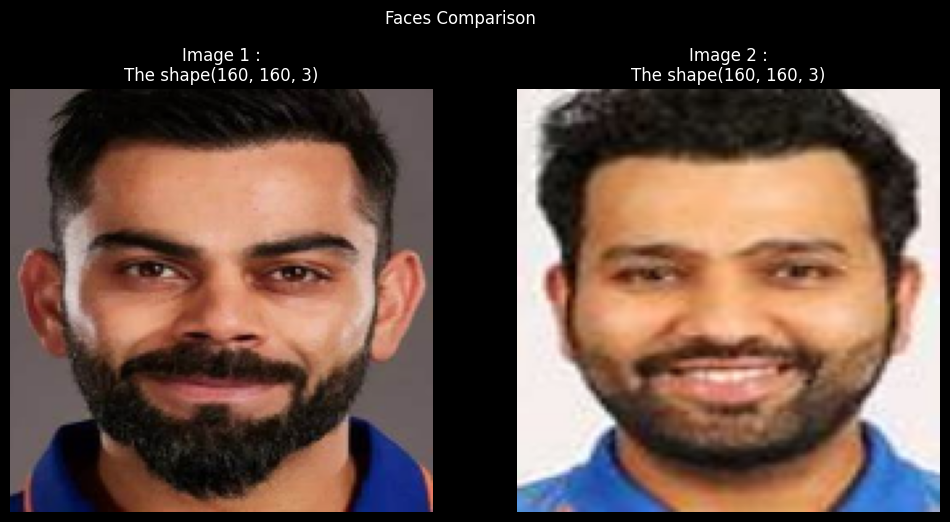

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Embedding vector: [ 5.39851151e-02  1.72654539e-02 -4.21930924e-02 -3.43930274e-02
 -2.42566783e-02 -4.29932214e-03  4.02649790e-02 -3.12211327e-02
  2.10699365e-02 -1.17989024e-02  1.15087908e-03  1.10976389e-02
 -5.45607395e-02  4.03507501e-02  9.24127027e-02 -8.58847648e-02
 -1.81628298e-02  2.14727651e-02  2.23743711e-02  5.81526011e-02
 -3.53826806e-02  1.39530171e-02  1.38111897e-02 -2.19791643e-02
  4.60219150e-03  2.69491691e-03 -2.87085753e-02 -3.93925346e-02
 -5.05584739e-02 -1.97941344e-02 -2.04692632e-02  1.66296922e-02
 -1.02839610e-02  5.99684417e-02  7.24517414e-03 -4.55895410e-04
 -2.40389351e-02  1.01148166e-01  1.96150281e-02 -1.14235720e-02
 -2.98115164e-02  2.04607076e-03 -1.19271837e-01 -1.62426964e-03
 -4.57949489e-02 -9.91095155e-02 -8.28628056e-03  3.19147445e-02
 -4.72934544e-02 -1.24800149e-02 -6.39398210e-03  1.79708470e-02
 -4.45078053e-02  3.12638283e-02 -3.70799340e-02  2.21872963e-02
 -6.87341318e-02  6.67527542e-02 -4.

In [187]:

showing(images_list[0] , images_list[2])

In [ ]:
cap=cv2.VideoCapture(0)
while True:
    ret, frame=cap.read()
    if not ret:
        break
    
    faces=detector.detect_faces(frame)
    for face_data in faces:
        x,y,width,height=face_data['box']
        x,y=abs(x),abs(y)
        face=frame[y:y+height, x:x+width]
        
        if face.size==0:
            continue
        
        embedding= get_embedding(face)
        
        
    

KeyboardInterrupt: 